In [1]:
# NAMA: DIKY ARIANTO TARIHORAN
# USERNAME: tarihoran
# EMAIL: dikytarihoran@gmail.com

In [2]:
import pandas as pd
import os
import itertools
import shutil
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import matplotlib.pyplot as plt


In [3]:
dataset_path = r"C:\SEM VI\DEEP LEARNING\DICODING\rockpaperscissors (1)\rockpaperscissors\rps-cv-images"

In [4]:

img_width, img_height = 150, 150


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4 
)

In [5]:

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'  
)

Found 1314 images belonging to 3 classes.


In [6]:

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)

Found 874 images belonging to 3 classes.


In [7]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax') 
])


C:\DATA SCIENCE\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20


C:\DATA SCIENCE\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 840ms/step - accuracy: 0.4599 - loss: 1.0120 - val_accuracy: 0.8634 - val_loss: 0.3761
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.1435 - val_accuracy: 0.9000 - val_loss: 0.0796
Epoch 3/20


C:\DATA SCIENCE\Anaconda\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 451ms/step - accuracy: 0.8730 - loss: 0.3819 - val_accuracy: 0.9259 - val_loss: 0.2815
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.1944 - val_accuracy: 1.0000 - val_loss: 0.0601
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 463ms/step - accuracy: 0.9248 - loss: 0.2200 - val_accuracy: 0.9248 - val_loss: 0.2118
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.8125 - loss: 0.1596 - val_accuracy: 0.8000 - val_loss: 0.1489
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 466ms/step - accuracy: 0.9370 - loss: 0.1881 - val_accuracy: 0.9421 - val_loss: 0.1873
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.0813 - val_accuracy: 1.0000 - val_loss: 0.0456
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 444ms/step - accuracy: 0.9482 - loss: 0.1678 - val_accuracy: 0.9259 - val_loss: 0.2186
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.9375 - loss: 0.0711 - val_accuracy: 0.7000 - val

In [10]:

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc)

28/28 - 6s - 211ms/step - accuracy: 0.9611 - loss: 0.1129

Test accuracy: 0.9610983729362488


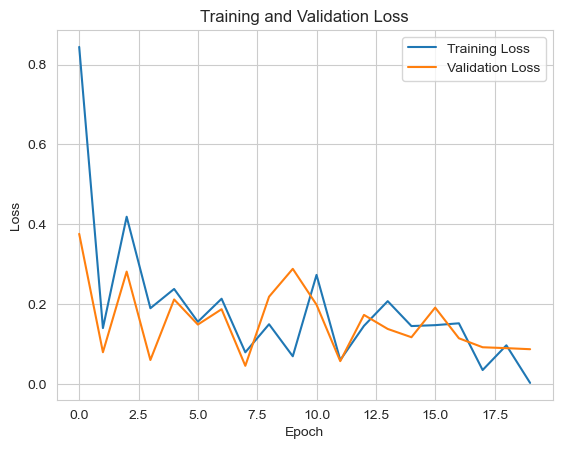

In [11]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

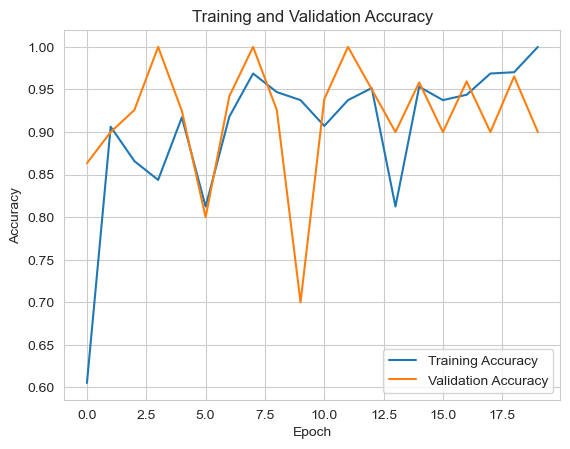

In [12]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:

def classify_image(image_path):
 
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 

  
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    
    class_names = train_generator.class_indices
    labels = {v: k for k, v in class_names.items()}

  
    print("Class:", labels[np.argmax(score)])
    print("Confidence:", 100 * np.max(score), "%")

   
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Class: paper
Confidence: 57.61168599128723 %


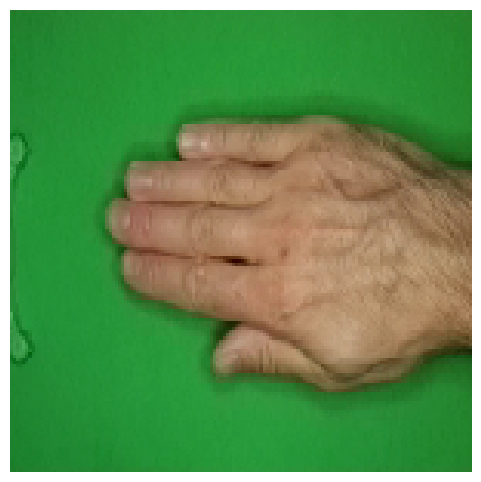

In [14]:

image_path = r"C:\SEM VI\DEEP LEARNING\DICODING\rockpaperscissors (1)\rockpaperscissors\rps-cv-images\paper\0Uomd0HvOB33m47I.png"
classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Class: rock
Confidence: 57.61168599128723 %


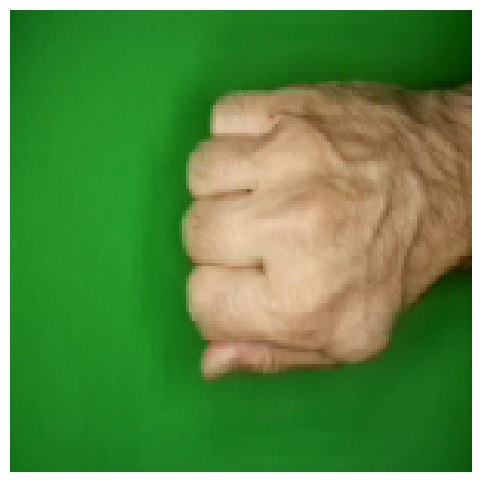

In [15]:

image_path = r"C:\SEM VI\DEEP LEARNING\DICODING\rockpaperscissors (1)\rockpaperscissors\rps-cv-images\rock\1UXuUYJ4rVj2eSvt.png"
classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Class: scissors
Confidence: 57.61168599128723 %


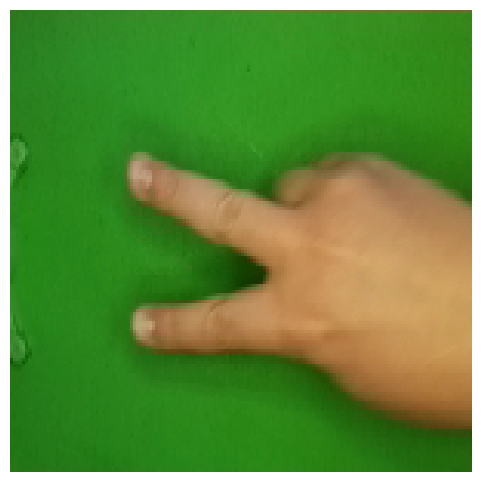

In [16]:

image_path = r"C:\SEM VI\DEEP LEARNING\DICODING\rockpaperscissors (1)\rockpaperscissors\rps-cv-images\scissors\5EUrUn1fjmi3TKE3.png"
classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Class: rock
Confidence: 57.61168599128723 %


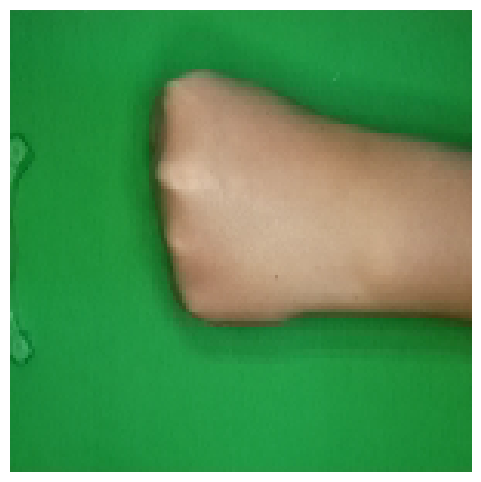

In [17]:

image_path = r"C:\SEM VI\DEEP LEARNING\DICODING\rockpaperscissors (1)\rockpaperscissors\rps-cv-images\rock\2HSPQEteONUjEXAF.png"
classify_image(image_path)

In [20]:
#PERCOBAN DATA MENGGUNAKAN TANGAN SENDIRI

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Class: paper
Confidence: 57.61168599128723 %


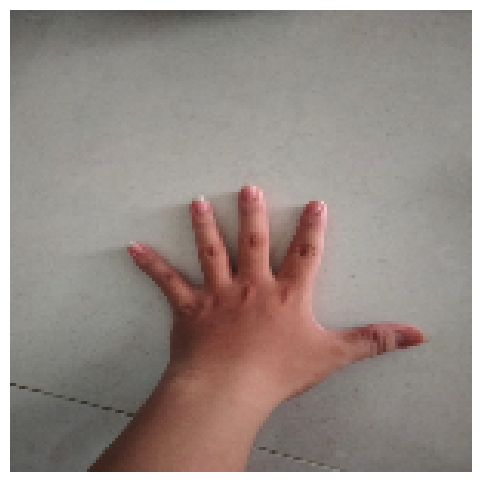

In [19]:

image_path = r"C:\SEM VI\DEEP LEARNING\DICODING\rockpaperscissors (1)\rockpaperscissors\rps-cv-images\1.KERTAS.jpg"
classify_image(image_path)